# **IMPORTACIÓN**

Se importan cada una de las librerias que se utilizaran

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Drive**

Se conecta al drive para leer el archivo desde alli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#url del archivo
url_train_file = '/content/drive/MyDrive/Colab Notebooks/analisis1/datos/train.csv'
df = pd.read_csv(url_train_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Explorando en archivo**

In [ ]:
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


# **Entendiendo la data**



*   Número de filas y columnas

*   Tipo de dato en las columnas
*   Datos faltantes



In [ ]:
#cantidad de datos
df.shape

(692500, 16)

In [ ]:
#tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [ ]:
#datos faltantes por culumnna
df.isna().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64

Variables categoricas

In [ ]:
ccols = [i for i in df.columns if not i in df._get_numeric_data()]
print (ccols)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


posibles varores de variables categoricas

In [ ]:
for c in ccols:
    print ("%10s"%c, np.unique(df[c].dropna()))

ESTU_PRGM_ACADEMICO ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACION DE GESTI

In [ ]:
c="RENDIMIENTO_GLOBAL"
df[c].value_counts()

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64

In [ ]:
c = "FAMI_TIENECOMPUTADOR"
df[c].value_counts()

FAMI_TIENECOMPUTADOR
Si    597670
No     56727
Name: count, dtype: int64

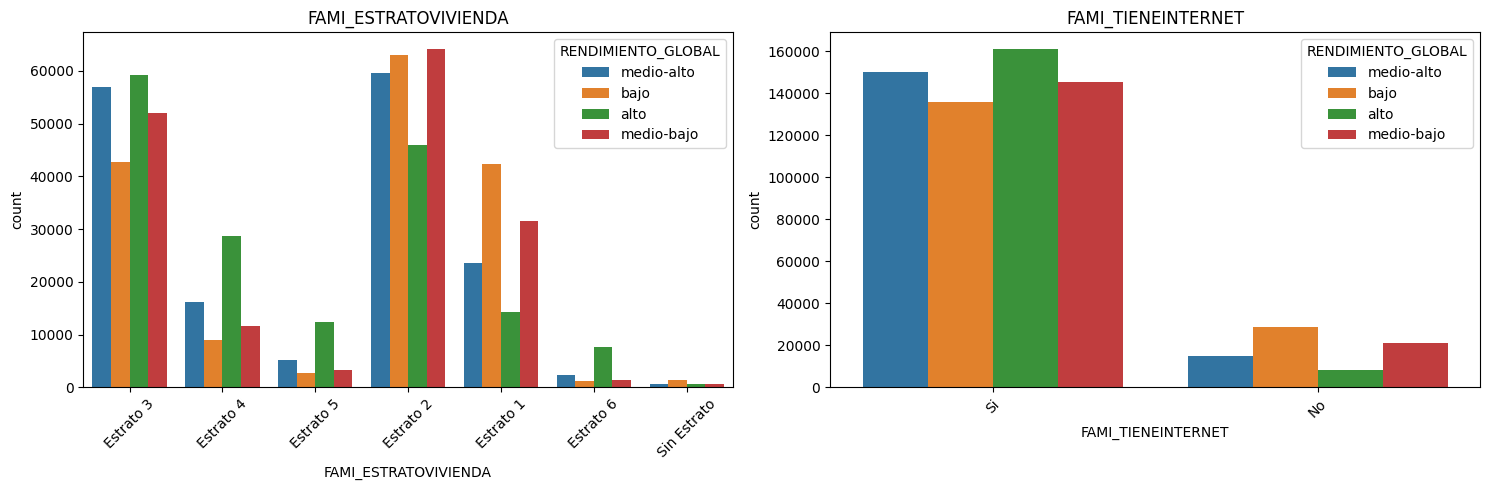

In [ ]:
# Variables que deseas graficar
variables = ["FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET"]

plt.figure(figsize=(15, 5))

# Itera sobre las variables y crea un gráfico para cada una
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=df)
    plt.title(c)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

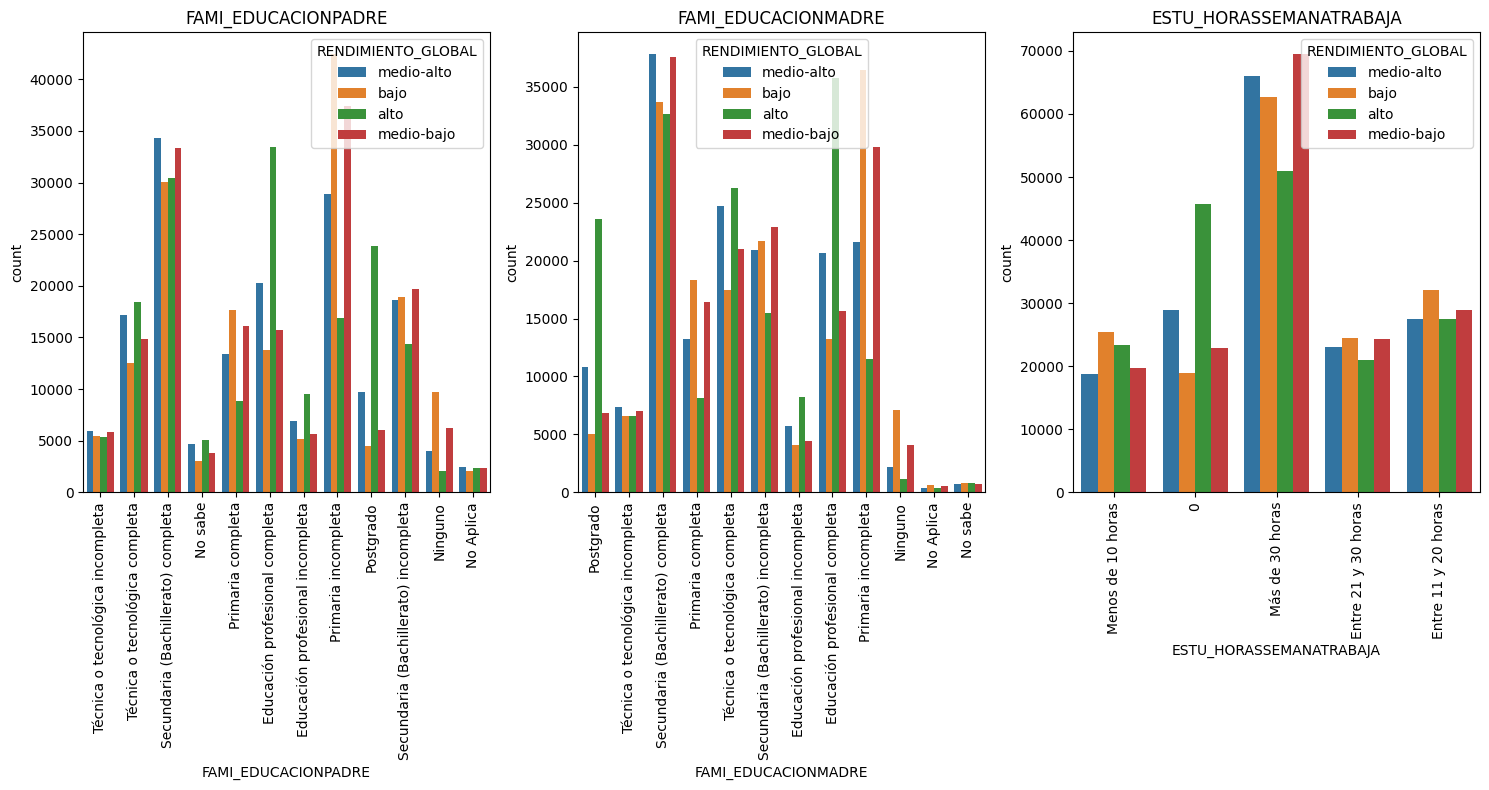

In [ ]:
# Variables que deseas graficar
variables = ["FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","ESTU_HORASSEMANATRABAJA"]

plt.figure(figsize=(15, 8))

# Itera sobre las variables y crea un gráfico para cada una
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=df)
    plt.title(c)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

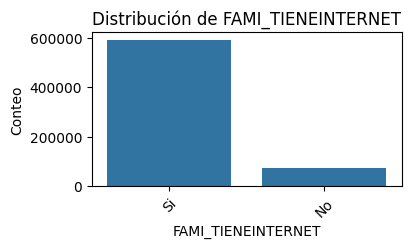

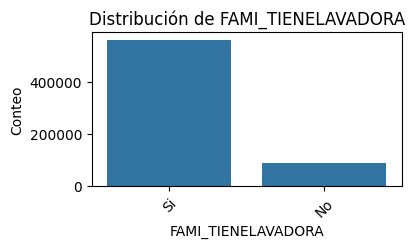

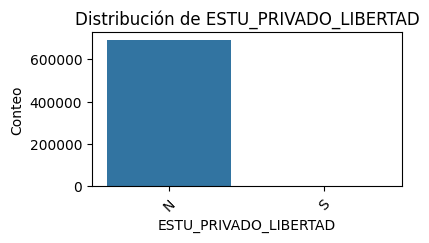

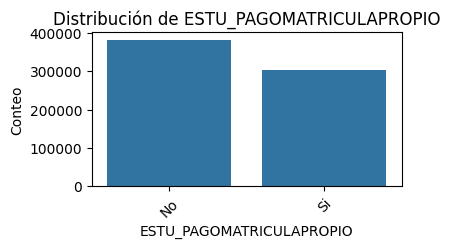

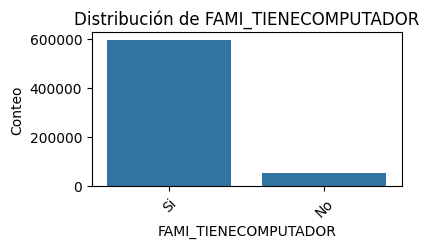

In [ ]:

# Define las variables que deseas graficar
variables = ["FAMI_TIENEINTERNET","FAMI_TIENELAVADORA", "ESTU_PRIVADO_LIBERTAD","ESTU_PAGOMATRICULAPROPIO", "FAMI_TIENECOMPUTADOR"]

# Crea un bucle para graficar cada variable
for var in variables:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.show()


**Copia del dataFrame original**

In [ ]:
df_copy = df.copy()

#**ANÁLISIS**

Teniendo en cuenta la infomación anterior estudiando el dataFrame se llega a dos primeras conclusiones.


*   La columna **ESTU_PRIVADO_LIBERTAD** no es necesaria ya que no tiene mayor diferencia en sus valores
*   Se elimina la columna **FAMI_TIENEINTERNET.1**, ya que se encuentra repetida



In [ ]:

df_copy = df_copy.drop('ESTU_PRIVADO_LIBERTAD', axis=1)
df_copy = df_copy.drop('FAMI_TIENEINTERNET.1', axis=1)


#**Reemplazando valores perdidos**
Para los valores perdidos en cada columna se reemplazara por el valor que mas se repite

In [ ]:
#variables categoricas
ccols = [i for i in df_copy.columns if not i in df._get_numeric_data()]
print (ccols)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


**Se hace busqueda para saber cual es es valor que mas se repite en cada columna y de esta forma ser utilizado para reemplazar en los datos faltante**

In [ ]:
valor_dato_comun = df_copy[ccols].mode().iloc[0]
valor_dato_comun

ESTU_PRGM_ACADEMICO                                              DERECHO
ESTU_PRGM_DEPARTAMENTO                                            BOGOTÁ
ESTU_VALORMATRICULAUNIVERSIDAD    Entre 1 millón y menos de 2.5 millones
ESTU_HORASSEMANATRABAJA                                  Más de 30 horas
FAMI_ESTRATOVIVIENDA                                           Estrato 2
FAMI_TIENEINTERNET                                                    Si
FAMI_EDUCACIONPADRE                   Secundaria (Bachillerato) completa
FAMI_TIENELAVADORA                                                    Si
FAMI_TIENEAUTOMOVIL                                                   No
ESTU_PAGOMATRICULAPROPIO                                              No
FAMI_TIENECOMPUTADOR                                                  Si
FAMI_EDUCACIONMADRE                   Secundaria (Bachillerato) completa
RENDIMIENTO_GLOBAL                                                  alto
Name: 0, dtype: object

In [ ]:
for column in ccols:
  df_copy[column].fillna(valor_dato_comun[column], inplace=True)

In [ ]:
#comprobación de valores faltantes
pd.isnull(df_copy).sum()

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL                0
dtype: int64

#**Normalizacion de Valores**

Para la columna **FAMI_ESTRATOVIVIENDA** se van a categorizar los valores del 0 al 6 de la siguiente manera

**0**  = Sin Estrato

**1** = Estrato 1

**2** = Estrato 2

**3** = Estrato 3

**4** = Estrato 4

**5** = Estrato 5

**6** = Estrato 6


In [ ]:
df_copy['FAMI_ESTRATOVIVIENDA'].replace(['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6','Sin Estrato'],[1,2,3,4,5,6,0],inplace=True)

In [ ]:
df_copy['RENDIMIENTO_GLOBAL'].replace(['bajo','medio-bajo','medio-alto','alto'],[1,2,3,4],inplace=True)

#**Columnas de Si y No**

Para las columnas con valores de Si y No que son:

**FAMI_TIENEINTERNET**,
**FAMI_TIENELAVADORA**,
**FAMI_TIENEAUTOMOVIL**,
**ESTU_PAGOMATRICULAPROPIO**,
**FAMI_TIENECOMPUTADOR**
Se les dara la categorización de la siguiente manera:

**0** = No

**1** = Si


In [ ]:
#diccionario = {'Si': 1, 'No': 0}

#df_copy = df_copy[["FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","FAMI_TIENEAUTOMOVIL","ESTU_PAGOMATRICULAPROPIO","FAMI_TIENECOMPUTADOR"]].replace(diccionario)

df_copy["FAMI_TIENEINTERNET"] = df_copy["FAMI_TIENEINTERNET"].replace({'Si': 1, 'No': 0})
df_copy["FAMI_TIENELAVADORA"] = df_copy["FAMI_TIENELAVADORA"].replace({'Si': 1, 'No': 0})
df_copy["FAMI_TIENEAUTOMOVIL"] = df_copy["FAMI_TIENEAUTOMOVIL"].replace({'Si': 1, 'No': 0})
df_copy["ESTU_PAGOMATRICULAPROPIO"] = df_copy["ESTU_PAGOMATRICULAPROPIO"].replace({'Si': 1, 'No': 0})
df_copy["FAMI_TIENECOMPUTADOR"] = df_copy["FAMI_TIENECOMPUTADOR"].replace({'Si': 1, 'No': 0})

Para la columna **ESTU_VALORMATRICULAUNIVERSIDAD** se va a categorizar con los valores del 0 al 7 de la siguiente manera

**0** = No pagó matrícula

**1** = Menos de 500 mil  

**2** = Entre 500 mil y menos de 1 millón  

**3** = Entre 1 millón y menos de 2.5 millones

**4** = Entre 2.5 millones y menos de 4 millones  

**5** = Entre 4 millones y menos de 5.5 millones

**6** = Entre 5.5 millones y menos de 7 millones
     
**7** = Más de 7 millones                            
                        

In [ ]:
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['No pagó matrícula'],[0],inplace=True)
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Menos de 500 mil'],[1],inplace=True)
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 500 mil y menos de 1 millón'],[2],inplace=True)
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 1 millón y menos de 2.5 millones'],[3],inplace=True)
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 2.5 millones y menos de 4 millones'],[4],inplace=True)
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 4 millones y menos de 5.5 millones'],[5],inplace=True)
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 5.5 millones y menos de 7 millones'],[6],inplace=True)
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Más de 7 millones'],[7],inplace=True)



Para la columna **ESTU_HORASSEMANATRABAJA** se va a categorizar con valores del 0 al 4 de la siguiente manera:

**0** = 0

**1** = Menos de 10 horas

**2** = Entre 11 y 20 horas

**3** = Entre 21 y 30 horas

**4** = Más de 30 horas


In [ ]:
df_copy['ESTU_HORASSEMANATRABAJA'].replace(['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas'],[0,1,2,3,4],inplace=True)

In [ ]:
df_copy.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6,1,3,1,Técnica o tecnológica incompleta,1,1,0,1,Postgrado,3
1,645256,20212,DERECHO,ATLANTICO,4,0,3,0,Técnica o tecnológica completa,1,0,0,1,Técnica o tecnológica incompleta,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4,4,3,1,Secundaria (Bachillerato) completa,1,0,0,0,Secundaria (Bachillerato) completa,1
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5,0,4,1,No sabe,1,0,0,1,Secundaria (Bachillerato) completa,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4,3,3,1,Primaria completa,1,1,0,1,Primaria completa,2


#**ANÁLIS DE LA COLUMNA ESTU_PRGM_ACADEMICO**

In [ ]:
# Reemplazar la parte "PROFESIONAL EN" con una cadena vacía
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].str.replace('PROFESIONAL EN ', '')

Para la columna **ESTU_PRGM_ACADEMICO** se decide hacer agrupación por los programas que tengan alguna relación

Ejemplo:

Para todas las INGENIERIAS se decide reemplazar por la palabra INGENIERIA

Para todas las LICENCIATURAS se decide reemplazar por la palabra LICENCIATURA

In [ ]:
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if x.startswith('INGE') else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'LICENCIATURA' if x.startswith('LIC') or x.startswith('Lic') else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ADMINISTRACION' if x.startswith('ADM')   else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CONTADURIA' if x.startswith('CONT')   else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'COMUNICACION' if x.startswith('COMU')   else x)

df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DEPORTE' if 'DEPORT'  in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'PSICOLOGIA' if 'PSIC' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TRABAJO SOCIAL' if 'TRABAJO SOCIAL' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DISEÑO' if 'DISE' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TERAPIA' if 'TERAP' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'GASTRONOMIA' if 'GASTRON' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'VETERINARIA Y ZOOTECNIA' if 'ZOOTECNIA' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'NUTRICION' if 'NUTRIC' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MARKETING' if ( 'MARKETING' in x or 'PUBLICIDAD' in x or 'MERCAD' in x) else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MATEMATICAS Y ESTADISTICA' if ('MATE' in x or 'ESTA' in x) else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ARTES' if 'ARTE' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'LITERATURA' if 'LITER' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MUSICA' if ('MUS' in x or 'MÚS' in x) else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ECONOMIA Y NEGOCIOS' if ('ECONO' in x or 'NEG' in x or 'COME' in x or 'FIN' in x) else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS DE LA TIERRA' if 'GEO' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS AUDIOVISUALES' if ('CINE' in x or 'RADIO' in x or 'TELEV' in x or 'AUDIOV' in x or 'FOTOG' in x) else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DERECHO' if 'DERECHO' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS POLITICAS' if ( 'POLIT' in x or 'POLÍT' in x) else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if 'INGE' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'QUIMICA' if ('QUIM' in x or 'QUÍM' in x or 'QU¿M' in x) else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CONSTRUCCION' if 'CONST' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TURISMO' if 'TURIS' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BIBLIOTECOLOGIA' if 'BIBLIO' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'FILOSOFIA' if 'FILOS' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'FILOLOGIA' if 'FILOL' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ODONTOLOGIA' if 'ODONTOLOG' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BIOLOGIA Y MICROBIOLOGIA' if 'BIOL' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ECOLOGIA' if x.startswith('ECOL')   else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BACTERIOLOGIA' if 'BACT' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].replace('ACUICULTURA', 'ACUICUlTURA')
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS CULTURALES' if 'CULT' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INSTRUMENTACION QUIRURGICA' if 'INSTRUMENTACION' in x else x)
df_copy['ESTU_PRGM_ACADEMICO'] = df_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS MARITIMAS Y AERONAUTICAS' if ('MILIT' in x or 'NAVALES' in x or 'NAU' in x) else x)


In [ ]:
c = "ESTU_PRGM_ACADEMICO"
df_copy[c].nunique()

111

In [ ]:
# Calcula el conteo de cada valor en la columna 'ESTU_PRGM_ACADEMICO'
conteo_valores = df_copy['ESTU_PRGM_ACADEMICO'].value_counts()

# Obtén los valores que tienen menos de N registros
valores_menos_de_20 = conteo_valores[conteo_valores <= 20]
valores_menos_de_20

# Reemplaza los valores que tienen menos de N registros con 'OTRO PROGRAMA'
for valor in valores_menos_de_20.index:
    df_copy.loc[df_copy['ESTU_PRGM_ACADEMICO'] == valor, 'ESTU_PRGM_ACADEMICO'] = 'OTRO PROGRAMA'

In [ ]:
df_copy["ESTU_PRGM_ACADEMICO"].nunique()

96

In [ ]:
df_copy["ESTU_PRGM_ACADEMICO"].unique()

array(['ENFERMERIA', 'DERECHO', 'MARKETING', 'ADMINISTRACION',
       'PSICOLOGIA', 'MEDICINA VETERINARIA', 'INGENIERIA', 'TURISMO',
       'LICENCIATURA', 'COMUNICACION', 'CIENCIAS POLITICAS',
       'GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL', 'MUSICA',
       'TRABAJO SOCIAL', 'CONTADURIA', 'MATEMATICAS Y ESTADISTICA',
       'VETERINARIA Y ZOOTECNIA', 'SEGURIDAD Y SALUD EN EL TRABAJO',
       'MEDICINA', 'ODONTOLOGIA', 'DISEÑO', 'ECONOMIA Y NEGOCIOS',
       'ARQUITECTURA', 'QUIMICA', 'RELACIONES INTERNACIONALES',
       'INSTRUMENTACION QUIRURGICA', 'TERAPIA', 'FARMACIA', 'ARTES',
       'OPTOMETRIA', 'JURISPRUDENCIA', 'SOCIOLOGIA', 'DEPORTE',
       'LITERATURA', 'CIENCIAS AUDIOVISUALES', 'NUTRICION', 'FILOSOFIA',
       'ENFERMERÍA', 'FILOLOGIA',
       'GERENCIA EN SISTEMAS DE INFORMACION EN SALUD',
       'TRADUCCION INGLES-FRANCES-ESPAÑOL', 'INTRUMENTACION QUIRURGICA',
       'PLANEACION Y DESARROLLO SOCIAL', 'CRIMINALISTICA',
       'BIOLOGIA Y MICROBIOLOGIA',
       'CIENC

#**Columnas ONE-HOT**

In [ ]:
df_encoded = pd.get_dummies(df_copy, columns= ["ESTU_PRGM_ACADEMICO","ESTU_PRGM_DEPARTAMENTO","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE"])

In [ ]:
df_encoded = df_encoded.astype(int)
df_encoded

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,904256,20212,6,1,3,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,645256,20212,4,0,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,308367,20203,4,4,3,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,5,0,4,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,989032,20212,4,3,3,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,2,2,2,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
692496,754213,20212,4,4,3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
692497,504185,20183,3,1,3,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
692498,986620,20195,4,1,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
